I took data that I used for Logistic Regression and SVC

# Load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
# load data
df = pd.read_csv("newbankdata.csv")

In [3]:
df.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Married,Single,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Blue,Gold,Silver
0,44,1,2,36,3,1,2,4010.0,1247,2763.0,...,1,0,0,1,0,0,0,1,0,0
1,57,0,2,48,5,2,2,2436.0,680,1756.0,...,1,0,0,0,0,0,1,1,0,0
2,45,0,2,37,6,1,2,14470.0,1157,13313.0,...,1,0,0,0,0,0,0,1,0,0
3,62,0,0,49,2,3,3,1438.3,0,1438.3,...,1,0,0,0,0,0,1,1,0,0
4,47,0,4,36,3,3,2,2492.0,1560,932.0,...,0,1,0,0,0,0,1,1,0,0


# X/y split

In [4]:
# a common trick in X/y -split
# X = everything else in the DataFrame minus the target variable
# y = only the target variable
X = df.drop('Attrition_Flag_Existing Customer', axis=1)
y = df['Attrition_Flag_Existing Customer']

In [5]:
# split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Create a model

In [6]:
# create model
model = make_pipeline(StandardScaler(), RandomForestClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

# Metrics and analysis

In [7]:
predictions = model.predict(X_test)

In [8]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# accuracy is very good

# in Logistic regression 
# Model overall accuracy: 90.13%

# In SVC
# Model overall accuracy: 92.56%

# the best result with the Random Forest

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       274
           1       0.95      0.99      0.97      1432

    accuracy                           0.95      1706
   macro avg       0.94      0.87      0.90      1706
weighted avg       0.95      0.95      0.95      1706


Model overall accuracy: 94.96%


<AxesSubplot:>

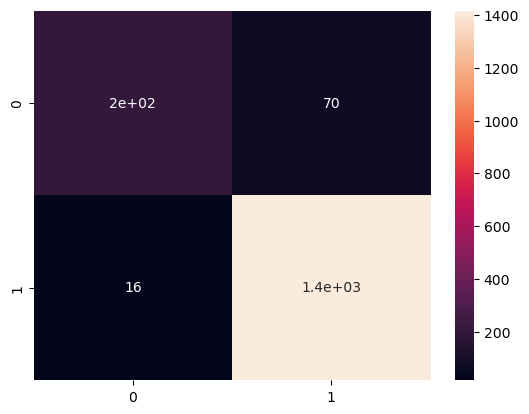

In [9]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [10]:
print(confusion_matrix(y_test, predictions))

# not many mistakes

[[ 204   70]
 [  16 1416]]


In [11]:
# basically 0.5 means you could get the same result with just random guessing
roc_auc_score(y_test.values, model.predict_proba(X_test)[:, 1])

# in Logistic regression 
# 0.4894710946715216

# In SVC
# 0.9734109762039079

# here is the best result

0.9864209109815275